# Colas 2019 EDA

In [1]:
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set up paths
data_dir = Path('/home/cjrisi/Projects/diabetes/nocturnal-hypo-gly-prob-forecast/cache/data/awesome_cgm/colas_2019/raw')
case_files = glob.glob(str(data_dir / 'case*.csv'))

print(f"Found {len(case_files)} case files")
print(f"First few files: {[Path(f).name for f in case_files[:5]]}")

Found 208 case files
First few files: ['case  189.csv', 'case  161.csv', 'case  184.csv', 'case  2.csv', 'case  165.csv']


In [2]:
# Function to read and analyze individual CSV files
def analyze_case_file(file_path):
    """Analyze a single case CSV file and return summary statistics."""
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Extract case number from filename
        case_num = Path(file_path).stem.replace('case', '').strip()
        
        # Basic statistics
        stats = {
            'case_number': case_num,
            'file_path': str(file_path),
            'total_readings': len(df),
            'readings_excluding_header': len(df),  # pandas automatically handles header
            'first_time': df['hora'].iloc[0] if len(df) > 0 else None,
            'last_time': df['hora'].iloc[-1] if len(df) > 0 else None,
            'glucose_mean': df['glucemia'].mean() if len(df) > 0 else None,
            'glucose_std': df['glucemia'].std() if len(df) > 0 else None,
            'glucose_min': df['glucemia'].min() if len(df) > 0 else None,
            'glucose_max': df['glucemia'].max() if len(df) > 0 else None,
            'glucose_median': df['glucemia'].median() if len(df) > 0 else None,
        }
        
        # Calculate estimated duration in hours (assuming 5-minute intervals)
        if len(df) > 0:
            stats['estimated_duration_hours'] = len(df) * 5 / 60  # 5 minutes per reading
            stats['estimated_days'] = stats['estimated_duration_hours'] / 24
        else:
            stats['estimated_duration_hours'] = 0
            stats['estimated_days'] = 0
            
        return stats
    except Exception as e:
        return {
            'case_number': Path(file_path).stem.replace('case', '').strip(),
            'file_path': str(file_path),
            'error': str(e)
        }

# Analyze all files
print("Analyzing all case files...")
all_stats = []

for i, file_path in enumerate(sorted(case_files)):
    if i % 20 == 0:  # Progress indicator
        print(f"Processing file {i+1}/{len(case_files)}")
    
    stats = analyze_case_file(file_path)
    all_stats.append(stats)

print(f"Analysis complete. Processed {len(all_stats)} files.")

Analyzing all case files...
Processing file 1/208
Processing file 21/208
Processing file 41/208
Processing file 61/208
Processing file 81/208
Processing file 101/208
Processing file 121/208
Processing file 141/208
Processing file 161/208
Processing file 181/208
Processing file 201/208
Analysis complete. Processed 208 files.


In [3]:
# Convert to DataFrame for easier analysis
stats_df = pd.DataFrame(all_stats)

# Check for any errors in processing
error_files = stats_df[stats_df['error'].notna()] if 'error' in stats_df.columns else pd.DataFrame()
if len(error_files) > 0:
    print(f"Warning: {len(error_files)} files had errors during processing:")
    for _, row in error_files.iterrows():
        print(f"  Case {row['case_number']}: {row['error']}")

# Remove error rows for summary statistics
valid_stats = stats_df[~stats_df['case_number'].isin(error_files['case_number'])] if len(error_files) > 0 else stats_df

print(f"\nSuccessfully processed {len(valid_stats)} case files")
print("\nFirst 5 cases:")
print(valid_stats[['case_number', 'total_readings', 'estimated_days', 'glucose_mean', 'glucose_min', 'glucose_max']].head())


Successfully processed 208 case files

First 5 cases:
  case_number  total_readings  estimated_days  glucose_mean  glucose_min  \
0           1             576             2.0     98.633157         69.0   
1          10             576             2.0     85.092014         49.0   
2         100             576             2.0    105.335069         66.0   
3         101             576             2.0     94.039931         79.0   
4         102             576             2.0    117.111111         90.0   

   glucose_max  
0        155.0  
1        121.0  
2        168.0  
3        118.0  
4        155.0  


# Summary Statistics

In [4]:
# Calculate overall summary statistics
print("=" * 60)
print("COLAS 2019 DATASET SUMMARY STATISTICS")
print("=" * 60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total number of case files: {len(valid_stats)}")
print(f"   • Total CGM readings across all cases: {valid_stats['total_readings'].sum():,}")
print(f"   • Total days covered (estimated): {valid_stats['estimated_days'].sum():.1f} days")
print(f"   • Average days per case: {valid_stats['estimated_days'].mean():.1f} days")

print(f"\n📈 CGM READINGS PER CASE:")
print(f"   • Mean readings per case: {valid_stats['total_readings'].mean():.1f}")
print(f"   • Median readings per case: {valid_stats['total_readings'].median():.0f}")
print(f"   • Min readings per case: {valid_stats['total_readings'].min()}")
print(f"   • Max readings per case: {valid_stats['total_readings'].max()}")
print(f"   • Standard deviation: {valid_stats['total_readings'].std():.1f}")

print(f"\n🩸 GLUCOSE LEVELS ACROSS ALL CASES:")
print(f"   • Mean glucose (mg/dL): {valid_stats['glucose_mean'].mean():.1f}")
print(f"   • Median glucose (mg/dL): {valid_stats['glucose_median'].mean():.1f}")
print(f"   • Overall min glucose: {valid_stats['glucose_min'].min():.1f} mg/dL")
print(f"   • Overall max glucose: {valid_stats['glucose_max'].max():.1f} mg/dL")
print(f"   • Average std dev across cases: {valid_stats['glucose_std'].mean():.1f}")

print(f"\n⏱️ TIME COVERAGE:")
print(f"   • Estimated total monitoring hours: {valid_stats['estimated_duration_hours'].sum():.1f} hours")
print(f"   • Average monitoring per case: {valid_stats['estimated_duration_hours'].mean():.1f} hours")
print(f"   • Assuming 5-minute intervals between readings")

COLAS 2019 DATASET SUMMARY STATISTICS

📊 DATASET OVERVIEW:
   • Total number of case files: 208
   • Total CGM readings across all cases: 114,912
   • Total days covered (estimated): 399.0 days
   • Average days per case: 1.9 days

📈 CGM READINGS PER CASE:
   • Mean readings per case: 552.5
   • Median readings per case: 576
   • Min readings per case: 288
   • Max readings per case: 576
   • Standard deviation: 79.1

🩸 GLUCOSE LEVELS ACROSS ALL CASES:
   • Mean glucose (mg/dL): 102.3
   • Median glucose (mg/dL): 99.8
   • Overall min glucose: 40.0 mg/dL
   • Overall max glucose: 318.0 mg/dL
   • Average std dev across cases: 17.1

⏱️ TIME COVERAGE:
   • Estimated total monitoring hours: 9576.0 hours
   • Average monitoring per case: 46.0 hours
   • Assuming 5-minute intervals between readings


In [5]:
# Detailed breakdown by readings count
print("\n📋 DETAILED BREAKDOWN BY NUMBER OF READINGS:")
readings_counts = valid_stats['total_readings'].value_counts().sort_index()
for readings, count in readings_counts.items():
    percentage = (count / len(valid_stats)) * 100
    estimated_hours = readings * 5 / 60  # 5 minutes per reading
    print(f"   • {readings} readings ({estimated_hours:.1f} hours): {count} cases ({percentage:.1f}%)")

# Check for any cases with unusual characteristics
print("\n🔍 CASES WITH UNUSUAL CHARACTERISTICS:")

# Very short monitoring periods (less than 1 day)
short_cases = valid_stats[valid_stats['estimated_days'] < 1.0]
if len(short_cases) > 0:
    print(f"   • Cases with < 1 day monitoring: {len(short_cases)} cases")
    print(f"     Case numbers: {', '.join(sorted(short_cases['case_number'].astype(str)))}")

# Very high or low glucose levels
extreme_glucose = valid_stats[
    (valid_stats['glucose_max'] > 250) | 
    (valid_stats['glucose_min'] < 50)
]
if len(extreme_glucose) > 0:
    print(f"   • Cases with extreme glucose levels (>250 or <50 mg/dL): {len(extreme_glucose)} cases")
    
# High variability cases (std > 30)
high_variability = valid_stats[valid_stats['glucose_std'] > 30]
if len(high_variability) > 0:
    print(f"   • Cases with high glucose variability (std > 30): {len(high_variability)} cases")


📋 DETAILED BREAKDOWN BY NUMBER OF READINGS:
   • 288 readings (24.0 hours): 17 cases (8.2%)
   • 576 readings (48.0 hours): 191 cases (91.8%)

🔍 CASES WITH UNUSUAL CHARACTERISTICS:
   • Cases with extreme glucose levels (>250 or <50 mg/dL): 20 cases
   • Cases with high glucose variability (std > 30): 10 cases


# Statistical Analysis

In [6]:
# Create summary table
summary_table = pd.DataFrame({
    'Metric': [
        'Total Cases',
        'Total CGM Readings', 
        'Total Days Covered',
        'Avg Days per Case',
        'Avg Readings per Case',
        'Mean Glucose (mg/dL)',
        'Min Glucose (mg/dL)', 
        'Max Glucose (mg/dL)',
        'Total Monitoring Hours'
    ],
    'Value': [
        f"{len(valid_stats):,}",
        f"{valid_stats['total_readings'].sum():,}",
        f"{valid_stats['estimated_days'].sum():.1f}",
        f"{valid_stats['estimated_days'].mean():.1f}",
        f"{valid_stats['total_readings'].mean():.1f}",
        f"{valid_stats['glucose_mean'].mean():.1f}",
        f"{valid_stats['glucose_min'].min():.1f}",
        f"{valid_stats['glucose_max'].max():.1f}",
        f"{valid_stats['estimated_duration_hours'].sum():.1f}"
    ]
})

print("COLAS 2019 DATASET SUMMARY TABLE")
print("=" * 40)
print(summary_table.to_string(index=False))

# Save detailed statistics to CSV for further analysis
output_file = '/home/cjrisi/Projects/diabetes/nocturnal-hypo-gly-prob-forecast/docs-internal/notebooks/colas_2019_case_statistics.csv'
valid_stats.to_csv(output_file, index=False)
print(f"\n💾 Detailed case statistics saved to: {output_file}")

# Display descriptive statistics
print("\n📊 DESCRIPTIVE STATISTICS FOR NUMERIC VARIABLES:")
numeric_cols = ['total_readings', 'estimated_days', 'glucose_mean', 'glucose_std', 'glucose_min', 'glucose_max']
desc_stats = valid_stats[numeric_cols].describe()
print(desc_stats.round(2))

COLAS 2019 DATASET SUMMARY TABLE
                Metric   Value
           Total Cases     208
    Total CGM Readings 114,912
    Total Days Covered   399.0
     Avg Days per Case     1.9
 Avg Readings per Case   552.5
  Mean Glucose (mg/dL)   102.3
   Min Glucose (mg/dL)    40.0
   Max Glucose (mg/dL)   318.0
Total Monitoring Hours  9576.0

💾 Detailed case statistics saved to: /home/cjrisi/Projects/diabetes/nocturnal-hypo-gly-prob-forecast/docs-internal/notebooks/colas_2019_case_statistics.csv

📊 DESCRIPTIVE STATISTICS FOR NUMERIC VARIABLES:
       total_readings  estimated_days  glucose_mean  glucose_std  glucose_min  \
count          208.00          208.00        208.00       208.00       208.00   
mean           552.46            1.92        102.28        17.11        69.91   
std             79.09            0.27         12.21         6.21        13.24   
min            288.00            1.00         68.79         6.84        40.00   
25%            576.00            2.00         

# Visualization

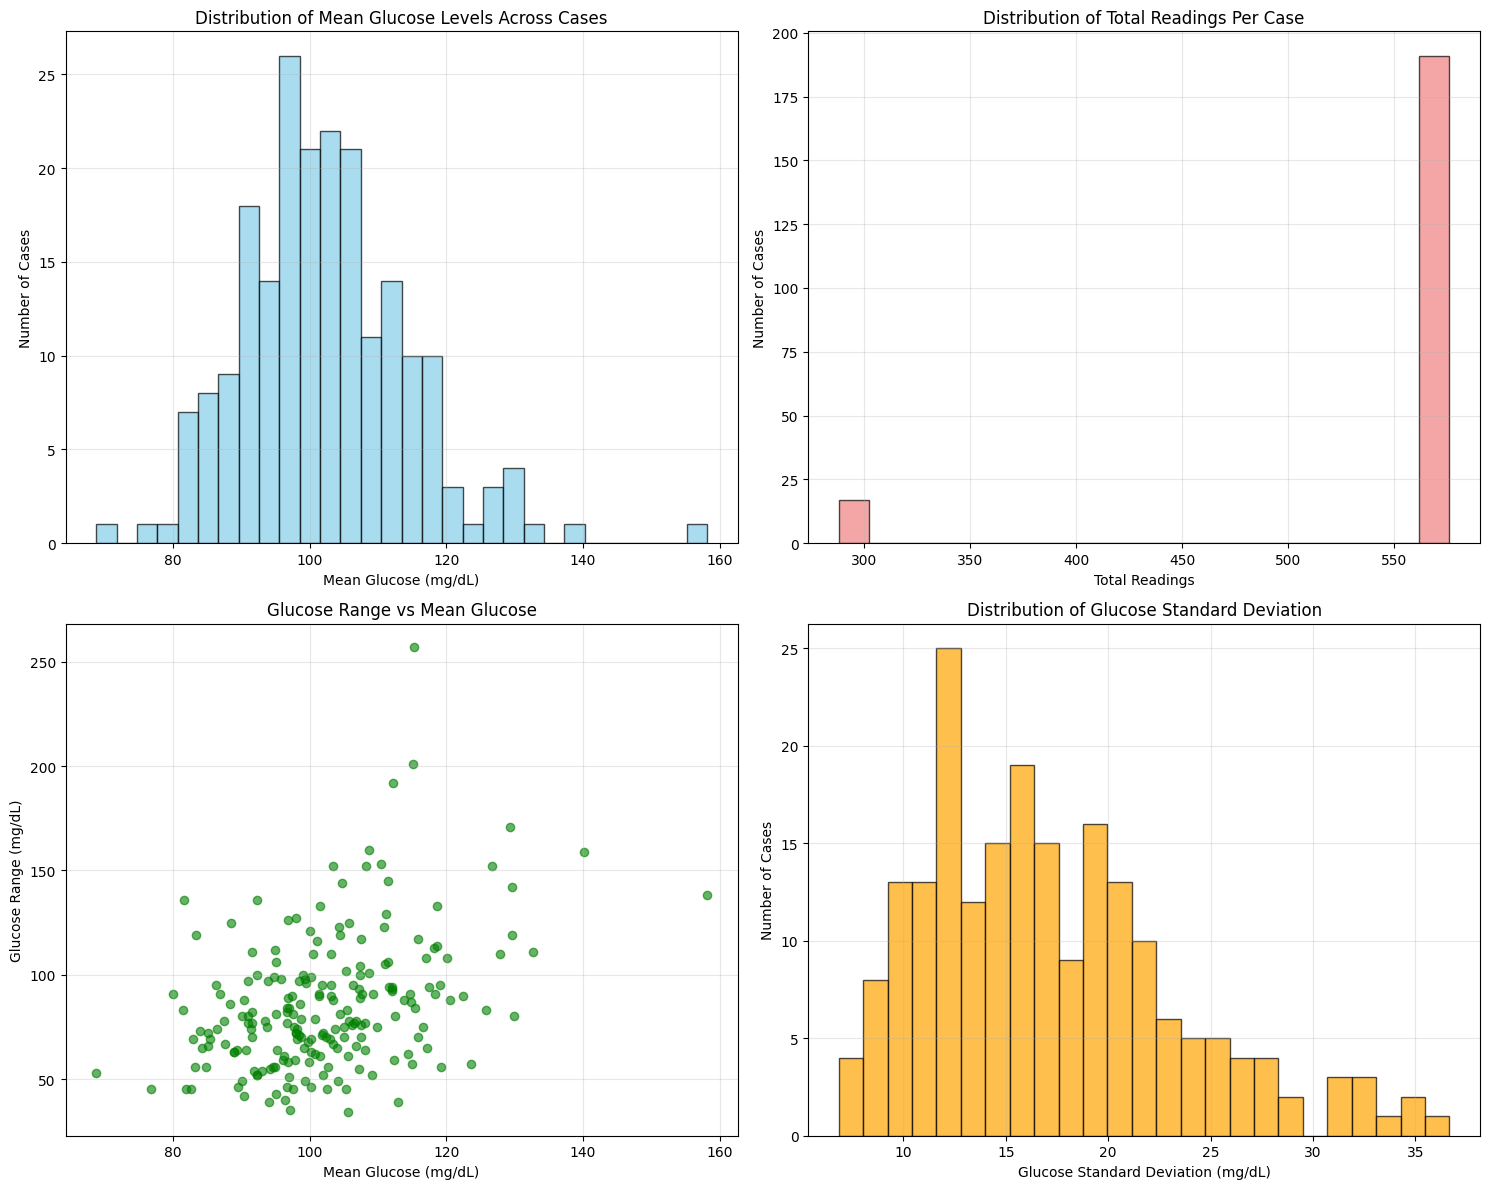


🔍 KEY FINDINGS:
   • Dataset contains 208 individual case files
   • Most cases (191) have 2 days of monitoring (576 readings)
   • 17 cases have only 1 day of monitoring (288 readings)
   • Average glucose level is 102.3 mg/dL with std of 12.2
   • Glucose ranges from 40.0 to 318.0 mg/dL across all cases
   • Total monitoring represents approximately 399 patient-days


In [7]:
# Create visualizations
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of glucose means across cases
axes[0, 0].hist(valid_stats['glucose_mean'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Mean Glucose Levels Across Cases')
axes[0, 0].set_xlabel('Mean Glucose (mg/dL)')
axes[0, 0].set_ylabel('Number of Cases')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of total readings per case
axes[0, 1].hist(valid_stats['total_readings'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Total Readings Per Case')
axes[0, 1].set_xlabel('Total Readings')
axes[0, 1].set_ylabel('Number of Cases')
axes[0, 1].grid(True, alpha=0.3)

# 3. Glucose range (max - min) vs mean glucose
glucose_range = valid_stats['glucose_max'] - valid_stats['glucose_min']
axes[1, 0].scatter(valid_stats['glucose_mean'], glucose_range, alpha=0.6, color='green')
axes[1, 0].set_title('Glucose Range vs Mean Glucose')
axes[1, 0].set_xlabel('Mean Glucose (mg/dL)')
axes[1, 0].set_ylabel('Glucose Range (mg/dL)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Standard deviation distribution
axes[1, 1].hist(valid_stats['glucose_std'], bins=25, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title('Distribution of Glucose Standard Deviation')
axes[1, 1].set_xlabel('Glucose Standard Deviation (mg/dL)')
axes[1, 1].set_ylabel('Number of Cases')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary of key findings
print("\n🔍 KEY FINDINGS:")
print(f"   • Dataset contains {len(valid_stats)} individual case files")
print(f"   • Most cases ({(valid_stats['total_readings'] == 576).sum()}) have 2 days of monitoring (576 readings)")
print(f"   • {(valid_stats['total_readings'] == 288).sum()} cases have only 1 day of monitoring (288 readings)")
print(f"   • Average glucose level is {valid_stats['glucose_mean'].mean():.1f} mg/dL with std of {valid_stats['glucose_mean'].std():.1f}")
print(f"   • Glucose ranges from {valid_stats['glucose_min'].min():.1f} to {valid_stats['glucose_max'].max():.1f} mg/dL across all cases")
print(f"   • Total monitoring represents approximately {valid_stats['estimated_days'].sum():.0f} patient-days")